In [1]:
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
### Keep all images in same size
Image_Size=[224,224]

In [3]:
###Image path for train and test(Valid)
train_path='Datasets/Train/'
valid_path='Datasets/Test/'

In [4]:
### Importing Resnet50
### using imagenet weights
resnet=ResNet50(include_top=False,input_shape=Image_Size+[3],weights='imagenet')

In [5]:
resnet

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
###not training existing wights
for layers in resnet.layers:
    layers.trainable=False

In [8]:
folders=glob('Datasets/Train/*')

In [9]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [10]:
### Flattening
x=Flatten()(resnet.output)

In [11]:
prediction=Dense(len(folders),activation='softmax')(x)

In [12]:
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 3) dtype=float32>

In [13]:
model=Model(inputs=resnet.input,outputs=prediction)

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
training_set=train_datagen.flow_from_directory('Datasets/Train/',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 64 images belonging to 3 classes.


In [18]:
testing_set=test_datagen.flow_from_directory('Datasets/Test/',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 58 images belonging to 3 classes.


In [19]:
r=model.fit_generator(training_set,validation_data=testing_set,
                     epochs=50,steps_per_epoch=len(training_set),
                     validation_steps=len(testing_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 7s 4s/step - loss: 5.2590 - accuracy: 0.3281 - val_loss: 8.5558 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 6s 3s/step - loss: 8.0621 - accuracy: 0.3906 - val_loss: 4.6801 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 6s 3s/step - loss: 5.3990 - accuracy: 0.4062 - val_loss: 7.6179 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 6s 3s/step - loss: 5.6877 - accuracy: 0.3125 - val_loss: 1.3746 - val_accuracy: 0.2759
Epoch 5/50
2/2 [==============================] - 6s 3s/step - loss: 1.3776 - accuracy: 0.5312 - val_loss: 2.5023 - val_accuracy: 0.4483
Epoch 6/50
2/2 [==============================] - 6s 3s/step - loss: 3.7454 - accuracy: 0.5469 - val_loss: 2.7133 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 6s 3s/step - loss: 3.6831 - accuracy: 0.5000 - val_l

In [20]:
r

In [21]:
r.history

{'loss': [5.258973121643066,
  8.062070846557617,
  5.398962020874023,
  5.687748432159424,
  1.3775519132614136,
  3.7453689575195312,
  3.683093309402466,
  1.107628345489502,
  2.831829071044922,
  1.7397327423095703,
  1.8196296691894531,
  1.9621696472167969,
  0.8244431018829346,
  1.439236044883728,
  0.6024356484413147,
  0.9311361312866211,
  0.5606481432914734,
  0.7584614157676697,
  0.4619847536087036,
  0.5547783374786377,
  0.5464305877685547,
  0.5230859518051147,
  0.5400645136833191,
  0.36106130480766296,
  0.5047546625137329,
  0.37171822786331177,
  0.47577863931655884,
  0.366538405418396,
  0.3150390386581421,
  0.2975156605243683,
  0.32933419942855835,
  0.32840949296951294,
  0.3309139609336853,
  0.3375045657157898,
  0.2981245517730713,
  0.2919737696647644,
  0.27981945872306824,
  0.30998164415359497,
  0.22047191858291626,
  0.226140558719635,
  0.21277298033237457,
  0.20022478699684143,
  0.20967507362365723,
  0.2269938886165619,
  0.2199074774980545,
 

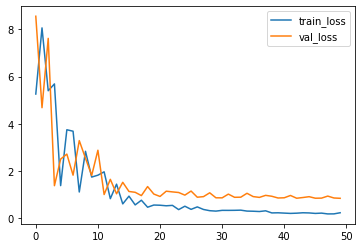

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig("LossValLoss")


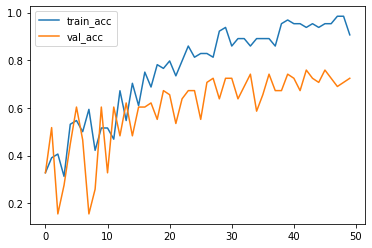

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig("AccVal_acc.jpg")


In [24]:
### Saving Model
model.save('model_resnet50.h5')

In [25]:
###prediction
y_pred=model.predict(testing_set)

In [26]:
y_pred

array([[4.45913002e-02, 1.19784065e-02, 9.43430364e-01],
       [1.02983117e-01, 1.49946837e-02, 8.82022202e-01],
       [1.72658190e-02, 6.95245087e-01, 2.87489086e-01],
       [4.32293601e-02, 9.06546786e-03, 9.47705090e-01],
       [2.86894962e-02, 4.74386781e-01, 4.96923655e-01],
       [1.88477799e-01, 6.81914747e-01, 1.29607409e-01],
       [9.24938470e-02, 5.92869055e-03, 9.01577413e-01],
       [4.58447449e-02, 8.49521816e-01, 1.04633518e-01],
       [1.57283328e-04, 9.92072999e-01, 7.76973739e-03],
       [5.00155836e-02, 5.00168979e-01, 4.49815422e-01],
       [2.31159050e-02, 3.96295518e-01, 5.80588579e-01],
       [7.34160142e-03, 7.41347134e-01, 2.51311272e-01],
       [5.04229516e-02, 8.43832254e-01, 1.05744787e-01],
       [7.14715687e-04, 9.78505790e-01, 2.07794402e-02],
       [2.29622419e-05, 3.28489346e-04, 9.99648571e-01],
       [2.26774290e-02, 1.36771530e-01, 8.40551078e-01],
       [5.87233126e-01, 1.98763579e-01, 2.14003310e-01],
       [5.00255704e-01, 3.11659

In [27]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2], dtype=int64)

In [28]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))


In [29]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [30]:
x.shape


(224, 224, 3)

In [31]:
x=x/255

In [32]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [33]:

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)


array([[0.00397101, 0.0138767 , 0.9821523 ]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)


In [36]:
a==1

array([False])

In [37]:
a==2

array([ True])

In [38]:
a==3

array([False])